In [38]:
# Import all the libraries that we shall be using
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb


In [2]:
df = pd.read_csv('Transform_Data.csv')

In [3]:
df['Dignosis'] = 0

In [4]:
df.info

<bound method DataFrame.info of    ASCRP3000001  ASCRP3000002  ASCRP3000003  ASCRP3000004  ASCRP3000005  \
0      2.754771      3.478207      3.197430      2.901669      2.928064   
1      2.662660      3.391250      3.251786      2.709865      2.831210   
2      2.743855      3.441500      3.218639      2.761449      2.906128   
3      2.711657      3.383201      3.251237      2.711657      2.848177   
4      2.721054      3.449090      3.244738      2.792737      2.886409   
5      2.725773      3.390197      3.167238      2.682317      2.842796   
6      2.671015      3.400217      3.347342      2.774226      2.890239   
7      2.682317      3.370649      3.277187      2.700272      2.847751   

   ASCRP3000006  ASCRP3000007  ASCRP3000008  ASCRP3000009  ASCRP3000010  ...  \
0      2.697507      3.140951      2.645558      2.776282      3.032367  ...   
1      2.702445      3.066214      2.761449      2.662660      2.832060  ...   
2      2.623671      2.994559      2.766857      2.6

In [5]:
pd.DataFrame([df.corr()['Dignosis'].sort_values()])

,ASCRP3000001,ASCRP3000002,ASCRP3000003,ASCRP3000004,ASCRP3000005,ASCRP3000006,ASCRP3000007,ASCRP3000008,ASCRP3000009,ASCRP3000010,...,ASCRP3013609,ASCRP3013610,ASCRP3013611,ASCRP3013612,ASCRP3013613,ASCRP3013614,ASCRP3013615,ASCRP3013616,ASCRP3013617,Dignosis
Dignosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
X_train = df.iloc[:,:-1]
y_train  = df.iloc[:,-1:]

In [7]:
y_train  = df.iloc[:,-1:]

In [8]:
# Convert from integer to float
X_train_fl = X_train.astype(float, 64)
#X_test_fl = X_test.astype(float, 64)

# Apply the same scaling to both datasets
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_fl)
#X_test_scl = scaler.transform(X_test_fl) # note that we transform rather than fit_transform

In [9]:
pca = PCA()
z= pca.fit_transform(X_train)

In [10]:
z[0]

array([ 1.05775803e+01,  1.06204821e+00, -1.75267052e+00,  1.19682884e-01,
       -1.91096160e-01,  1.93516266e-02, -3.04913301e-03,  2.25589959e-14])

3 features explain around 90% of the variance. From 7129 features to 3, not too bad.


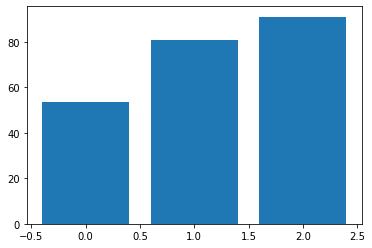

In [70]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 90% of the variance. From 7129 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train.pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
#X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [23]:
pca3 = PCA(n_components= 8).fit(X_train)
X_train_reduced = pca3.transform(X_train)

In [24]:
len(X_train_reduced)

8

In [85]:
print(pca3.explained_variance_ratio_)

[5.37091602e-01 2.70702204e-01 1.03780745e-01 4.03938803e-02
 2.57951015e-02 1.30019546e-02 9.23451283e-03 1.46068259e-29]


In [32]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=23)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(8, 23)


C:\Users\laptop\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\laptop\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_selection\_univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  corr /= np.linalg.norm(y)


In [37]:
X_selected[0]

array([2.9356313 , 3.12112767, 2.68407058, 2.58181396, 3.61415029,
       2.67993746, 3.38273228, 2.62088197, 2.59066512, 2.59066512,
       2.675392  , 2.67150896, 2.66767562, 2.7344877 , 2.7187073 ,
       2.57388115, 2.63692387, 2.61356713, 2.57854025, 3.01893832,
       2.63284721, 2.66404036, 3.15618628])

In [34]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=23)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(8, 23)


C:\Users\laptop\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\laptop\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_selection\_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


In [36]:
X_selected[ 0]

array([2.9356313 , 3.12112767, 2.68407058, 2.58181396, 3.61415029,
       2.67993746, 3.38273228, 2.62088197, 2.59066512, 2.59066512,
       2.675392  , 2.67150896, 2.66767562, 2.7344877 , 2.7187073 ,
       2.57388115, 2.63692387, 2.61356713, 2.57854025, 3.01893832,
       2.63284721, 2.66404036, 3.15618628])